In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import GEMS
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from scipy.stats import ttest_ind as ttest
from sklearn.decomposition import PCA
from scipy import stats 
from matplotlib import gridspec
from statsmodels.stats.multitest import multipletests
import matplotlib.cm as cm
import etcpy


In [2]:
model = pickle.load(open('../results/smcabc_gem_three_conditions_save_all_particles.pkl','rb'))

In [3]:
model

In [4]:
def build_a_dataframe_for_all_particles(results):
    columns = list(results.all_particles[0].keys())
    columns.sort()

    data = list()
    for p in results.all_particles:
        data.append([p[k] for k in columns])
    df = pd.DataFrame(data=data,columns=columns)
    df['r2'] = results.all_distances
    print(df.shape)
    
    # Remove samples with a R2 score smaller than -3
    df['r2'] = -df['r2']
    sel_index = df.index[df['r2']>-3]
    df = df.loc[sel_index,:]
    print(df.shape)

    return df

In [5]:
def perform_pca_on_parameters(df):
    # 1. normalize all columns to a standard normal distribution
    X, y = df.values[:,:-1], df.values[:,-1]
    X_n = np.zeros_like(X)
    
    for i in range(X_n.shape[1]): X_n[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    pca = PCA(n_components=2)
    PCS = pca.fit_transform(X_n)
    print(pca.explained_variance_ratio_)
    return PCS,pca.explained_variance_ratio_

In [6]:
df_theta = build_a_dataframe_for_all_particles(model)
PCS,EV = perform_pca_on_parameters(df_theta)

(21504, 2293)
(21058, 2293)
[0.01146383 0.0037759 ]


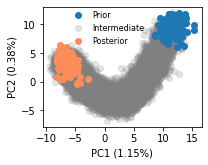

In [11]:
y = df_theta.values[:,-1]
plt.figure(figsize=(3.,2.4))

plt.scatter(PCS[:,0],PCS[:,1],color='grey',alpha=0.2)
plt.scatter(PCS[:128,0],PCS[:128,1],color='#1f78b4',label='Prior')
plt.scatter([],[],color='grey',alpha=0.2,label='Intermediate')
plt.scatter(PCS[y>0.9,0],PCS[y>0.9,1],color='#fc8d59',label='Posterior')

plt.xlabel('PC1 ({:.2f}%)'.format(EV[0]*100))
plt.ylabel('PC2 ({:.2f}%)'.format(EV[1]*100))
plt.legend(frameon=False,loc=(0.15,0.65),fontsize=8)
plt.xticks(np.arange(-10,20,5))
plt.tight_layout()
#plt.savefig('../figures/pca.pdf')
plt.savefig('../figures/pca.png',dpi=300)
plt.show()


In [23]:
df_theta.columns[-1]

'r2'

In [24]:
df_theta_posterior = df_theta.query("r2 > 0.9")

In [26]:
df_theta_posterior
PCS,EV = perform_pca_on_parameters(df_theta_posterior)

[0.01226696 0.01198096]


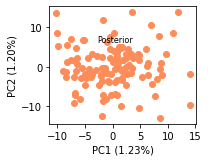

In [28]:
y = df_theta.values[:,-1]
plt.figure(figsize=(3.,2.4))
plt.scatter(PCS[:,0],PCS[:,1],color='#fc8d59',label='Posterior')
plt.xlabel('PC1 ({:.2f}%)'.format(EV[0]*100))
plt.ylabel('PC2 ({:.2f}%)'.format(EV[1]*100))
plt.legend(frameon=False,loc=(0.15,0.65),fontsize=8)
plt.xticks(np.arange(-10,20,5))
plt.tight_layout()


In [33]:
std_over_mean = df_theta_posterior.std() / df_theta_posterior.mean()

In [34]:
for value in std_over_mean: print(value)

0.014229050178789159
0.012596484231546124
-0.29725508606170575
0.01601214285066065
0.010796773969319351
-0.5012230952998202
0.021684426442677956
0.015093102593099423
-0.2007882090113922
0.013362967275050437
0.026549533925877836
-0.19388190973978736
0.016963217404543297
0.02238551218983209
-0.2503642411913078
0.010866537087641162
0.0238328186470702
-0.3860434879063137
0.015286803086019738
0.028888368051479586
-0.1951148975071538
0.008871571646757233
0.014362019544327474
-0.3094965248969525
0.013526181540476277
0.019992380564633774
-0.21174178120521123
0.01070929179946204
0.02566892129053166
-0.20153612353929942
0.007610102673606437
0.03497619875443505
-0.3951442460135148
0.007076185473512432
0.018870343527392294
-0.2534861758517673
0.017861637562136014
0.02315121778497567
-0.3324060166812842
0.015125333587676324
0.022234689038429244
-0.16386752673579946
0.008596196935247248
0.0307290281391282
-0.32131904673260553
0.00968889832376104
0.02129515739851073
-0.3384794468708936
0.008126192824

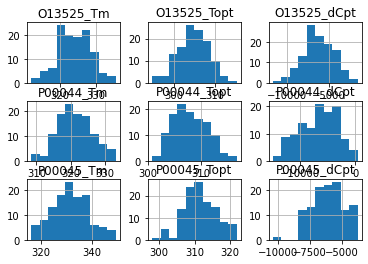

In [41]:
posterior_histograms = df_theta_posterior.iloc[:,0:9].hist()

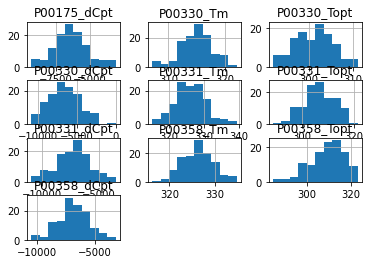

In [42]:
posterior_histograms = df_theta_posterior.iloc[:,20:30].hist()

This is great. There are no major surprises here, so we do not need to wory about problems such as bimodal distributions and any such problems.